<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use **matplotlib**, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [ ]:
!pip install --upgrade openpyxl

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

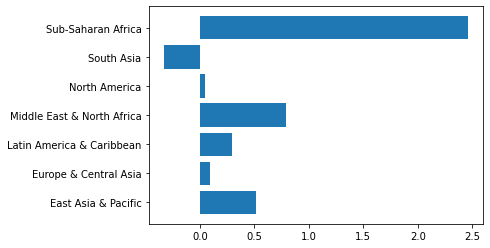

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df=pd.read_excel(url, sheet_name="Country Migration")
#df
region = df.groupby(["base_country_wb_region"]).mean()
#region
data=region["net_per_10K_2015"]
#data
labels=data.keys()
labels

plt.barh(labels,data)#change x-axis data to y-axis
plt.show()


### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

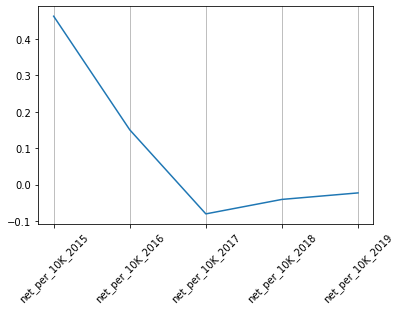

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df=pd.read_excel(url, sheet_name="Country Migration")
#df.info()
new_df=df.drop(columns=['base_country_code','base_country_name', 'base_country_wb_income','base_country_wb_region','target_country_code', 'target_country_name','target_country_wb_income', 'target_country_wb_region', 'base_lat', 'base_long', 'target_lat', 'target_long'])
#new_df
data=new_df.mean()
#data
labels=data.keys()
#labels
plt.plot(labels, data)
plt.xticks(rotation=45)
plt.grid(axis='x')


plt.show()



### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis 
* display your bar graph with plt.show 

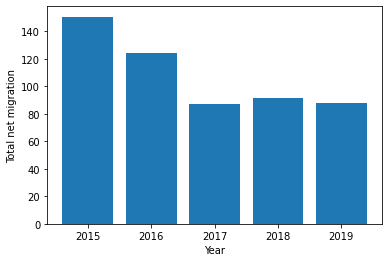

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df=pd.read_excel(url, sheet_name="Country Migration")
#df.info()

new_df=df.drop(columns=['base_country_code','base_country_name', 'base_country_wb_income','base_country_wb_region','target_country_code', 'target_country_name','target_country_wb_income', 'target_country_wb_region', 'base_lat', 'base_long', 'target_lat', 'target_long'])
#new_df
data=new_df.max()
#data
labels=['2015','2016','2017','2018','2019']
#labels
plt.bar(labels, data)
plt.xlabel('Year')
plt.ylabel('Total net migration')

plt.show()


### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

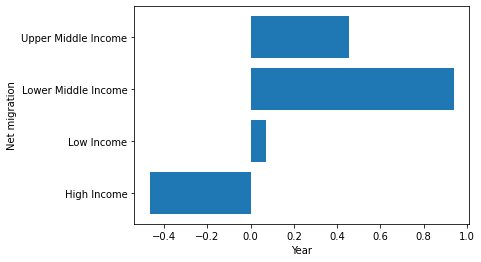

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df=pd.read_excel(url, sheet_name="Country Migration")
#df.info()

new_df=df[['target_country_wb_income','net_per_10K_2019']]
#new_df
data=new_df.groupby(['target_country_wb_income'])['net_per_10K_2019'].mean()
#data
labels=data.keys()
#labels
plt.barh(labels, data)
plt.xlabel('Year')
plt.ylabel('Net migration')
plt.show()


# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data=pd.read_csv(url)
psych_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




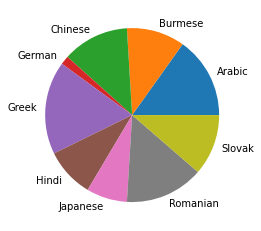

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data=pd.read_csv(url)
#psych_data.info()

means = psych_data.groupby(['firstlanguage']).mean()
#means
data = means['Stress']
#data
labels=data.keys()
#labels
plt.pie(data, labels = labels)
plt.show()


It seems everyone else but Germans are less stress out when knowing more than one language

### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot 
*  show the boxplot

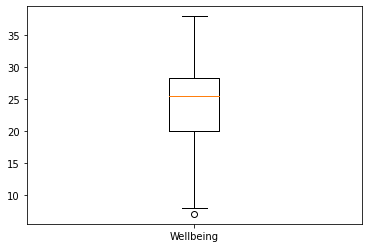

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data=pd.read_csv(url)
#psych_data.info()




### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


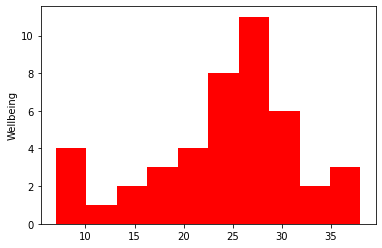

In [ ]:


wellbeing=psych_data["Wellbeing"]
#wellbeing
plt.hist(wellbeing)
plt.xlabel('')
plt.ylabel('Wellbeing')
plt.hist(wellbeing, color='red')

plt.show()

### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   
* the code cell below already has the linregress function imported from the scipy.stats library
* create a regression variable and assign the result of using linregress (`regression = linregress(x,y)` )
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plot a line using `plt.plot(x, slope*x + intercept)` 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




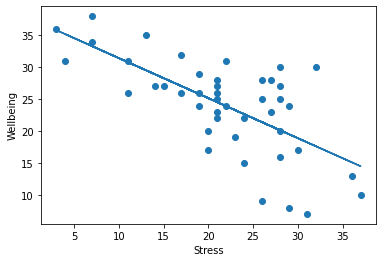

In [ ]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

url="https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data=pd.read_csv(url)
#psych_data.info()

x=psych_data["Stress"]
y=psych_data["Wellbeing"]
plt.scatter(x,y)#FIRST SCATTER PLOT THE DATA
regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)#PLOT LINE REGRESSION


plt.xlabel('Stress')#ADD LABELS
plt.ylabel('Wellbeing')
plt.show()

### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
scores=pd.read_csv(url)
scores.info()
scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


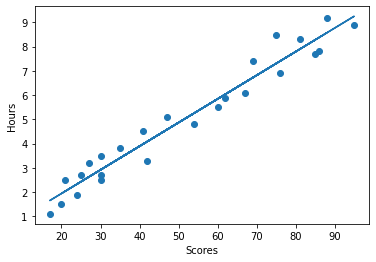

In [ ]:
x=scores["Scores"] #IV
y=scores["Hours"]#DV
plt.scatter(x,y)#FIRST SCATTER PLOT THE DATA
regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)#PLOT LINE REGRESSION


plt.xlabel('Scores')#ADD LABELS
plt.ylabel('Hours')
plt.show()

The dots are the result of random deviations from an underlying relationship between hours and scores.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


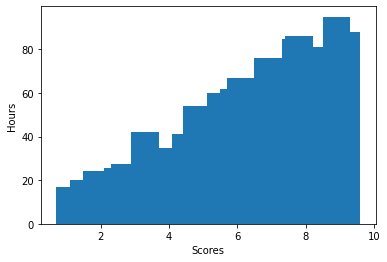

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
scores=pd.read_csv(url)
scores.info()
scores.head()

data=scores.groupby(['Hours'])['Scores'].mean()
#data
labels=data.keys()
#labels
plt.bar(labels, data)#bar chart
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.show()


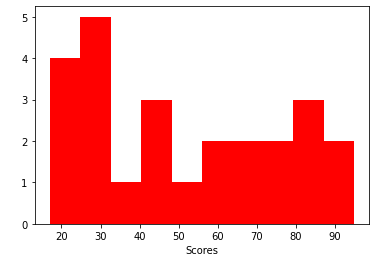

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
scores=pd.read_csv(url)

score=scores["Scores"]

plt.hist(score)#Scores distribution
plt.xlabel('Scores')
plt.ylabel(" ")
plt.hist(score, color='red')

plt.show()

Histogram done on Scores (data) shows an abnormal distribution of the data. 

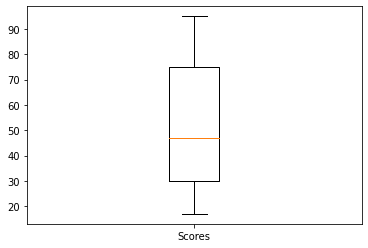

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
scores=pd.read_csv(url)


score=scores["Scores"]
#wellbeing
labels=["Scores"]
#labels
plt.boxplot(score, labels=labels)
plt.show()

Median value is not centered showing that distribution of the data is not normal as shown with the historgram above and the long whiskers also show  that there are outliers within the data. 



# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)